In [236]:

Exploratory Data Analysis (EDA):
1.	Load the dataset and perform basic data exploration.
2.	Examine the distribution of features using histograms, box plots, or density plots.
3.	Investigate correlations between features to understand relationships within the data.
Task 2: Dimensionality Reduction with PCA:
1.	Standardize the features to ensure they have a mean of 0 and a standard deviation of Implement PCA to reduce the dimensionality of the dataset.
2.	Determine the optimal number of principal components using techniques like scree plot or cumulative explained variance.
3.	Transform the original dataset into the principal components.
Task 3: Clustering with Original Data:
1.	Apply a clustering algorithm (e.g., K-means) to the original dataset.
2.	Visualize the clustering results using appropriate plots.
3.	Evaluate the clustering performance using metrics such as silhouette score or Davies–Bouldin index.
Task 4: Clustering with PCA Data:
1.	Apply the same clustering algorithm to the PCA-transformed dataset.
2.	Visualize the clustering results obtained from PCA-transformed data.
3.	Compare the clustering results from PCA-transformed data with those from the original dataset.
Task 5: Comparison and Analysis:
1.	Compare the clustering results obtained from the original dataset and PCA-transformed data.
2.	Discuss any similarities or differences observed in the clustering results.
3.	Reflect on the impact of dimensionality reduction on clustering performance.
4.	Analyze the trade-offs between using PCA and clustering directly on the original dataset.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report
sns.set_theme(style='darkgrid')
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 200
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [238]:
df = pd.read_csv(r"D:\Admin\Downloads\wine.csv")

In [240]:
df

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [ ]:
#Exploratory Data Analysis (EDA):

In [242]:
df.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [244]:
df.drop(columns=['Type'], inplace=True)

In [246]:
df

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [248]:
df.isna()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,False,False,False,False,False,False,False,False,False,False,False,False,False
174,False,False,False,False,False,False,False,False,False,False,False,False,False
175,False,False,False,False,False,False,False,False,False,False,False,False,False
176,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
#VISUALIZATION OF THE DATASET

<Axes: >

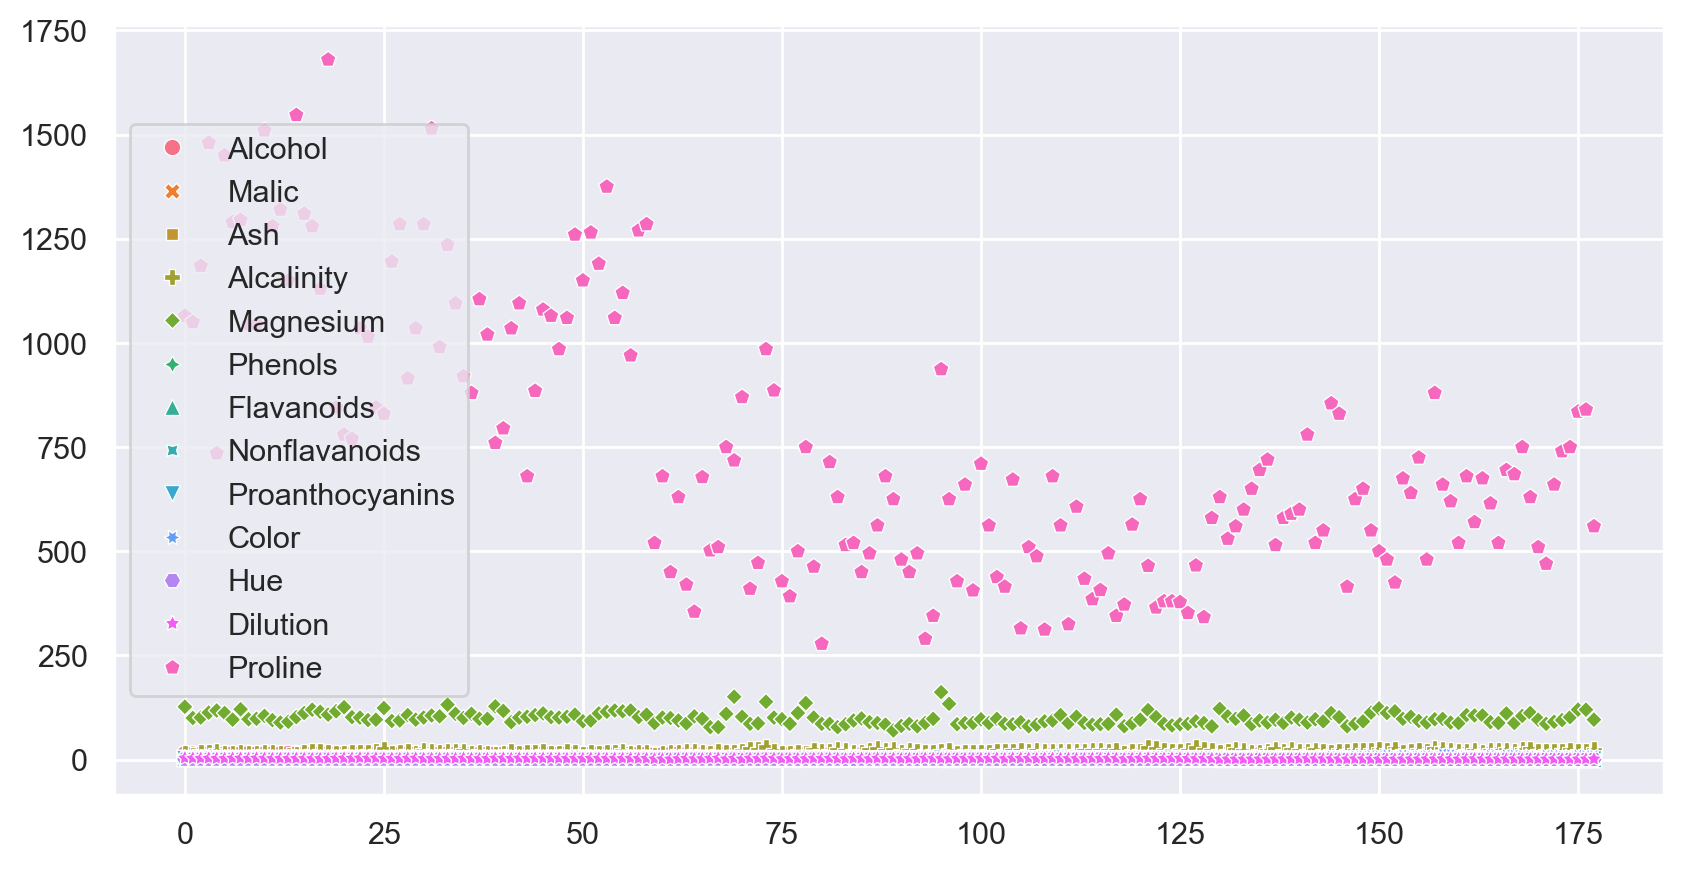

In [250]:
sns.scatterplot(df)

array([[<Axes: title={'center': 'Alcohol'}>,
        <Axes: title={'center': 'Malic'}>,
        <Axes: title={'center': 'Ash'}>,
        <Axes: title={'center': 'Alcalinity'}>],
       [<Axes: title={'center': 'Magnesium'}>,
        <Axes: title={'center': 'Phenols'}>,
        <Axes: title={'center': 'Flavanoids'}>,
        <Axes: title={'center': 'Nonflavanoids'}>],
       [<Axes: title={'center': 'Proanthocyanins'}>,
        <Axes: title={'center': 'Color'}>,
        <Axes: title={'center': 'Hue'}>,
        <Axes: title={'center': 'Dilution'}>],
       [<Axes: title={'center': 'Proline'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

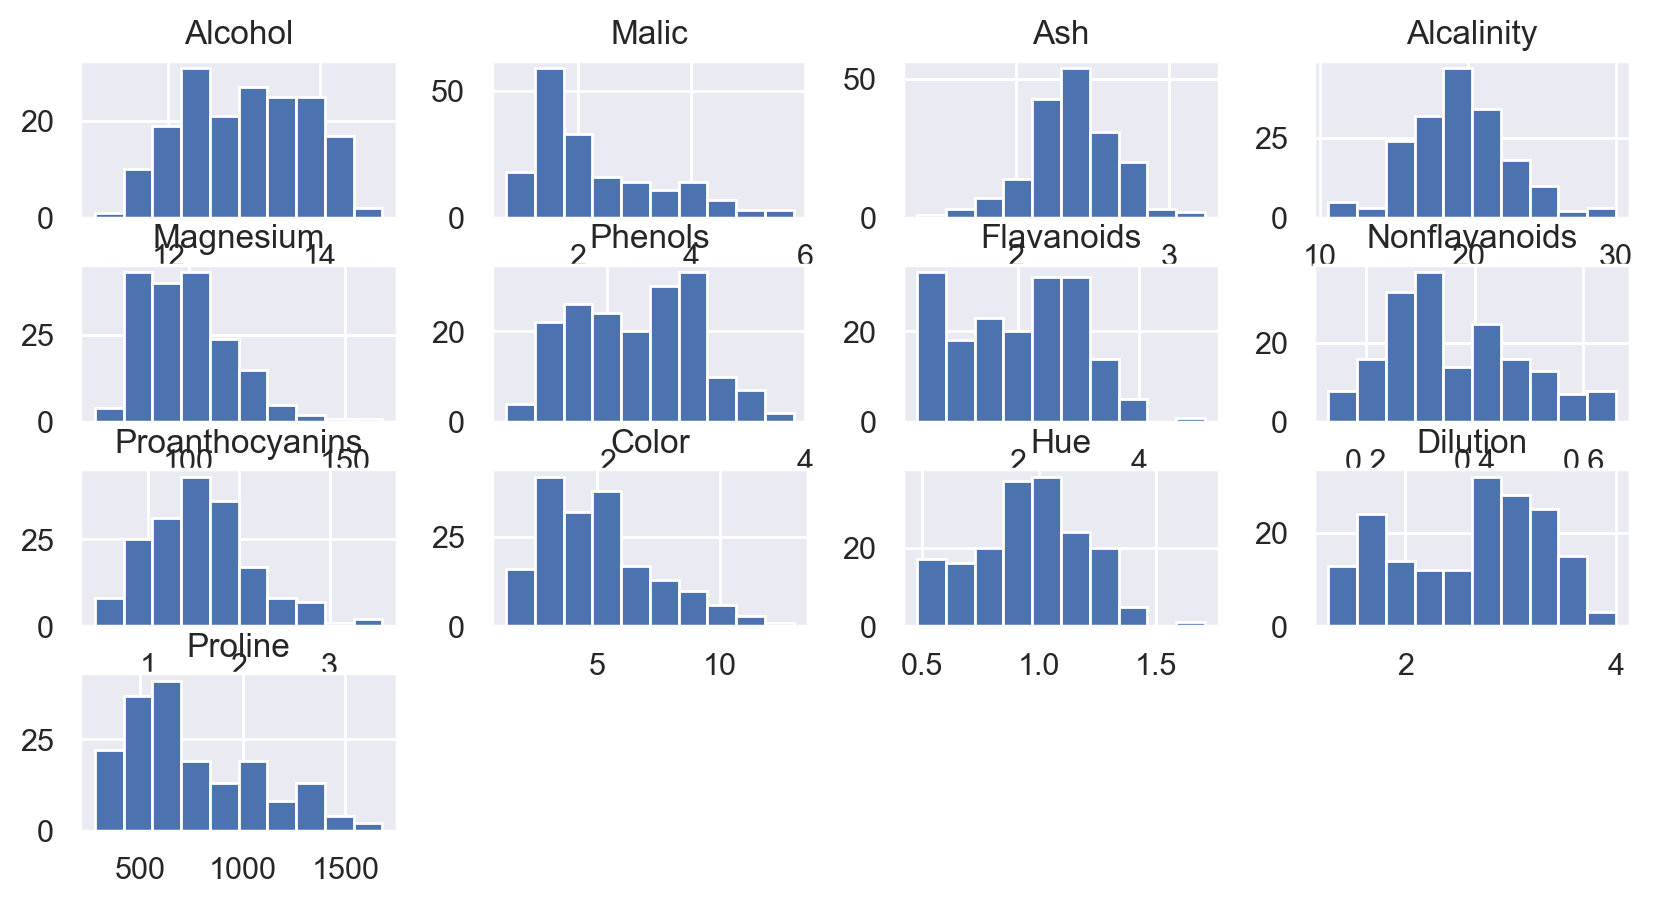

In [251]:
df.hist()

<Axes: >

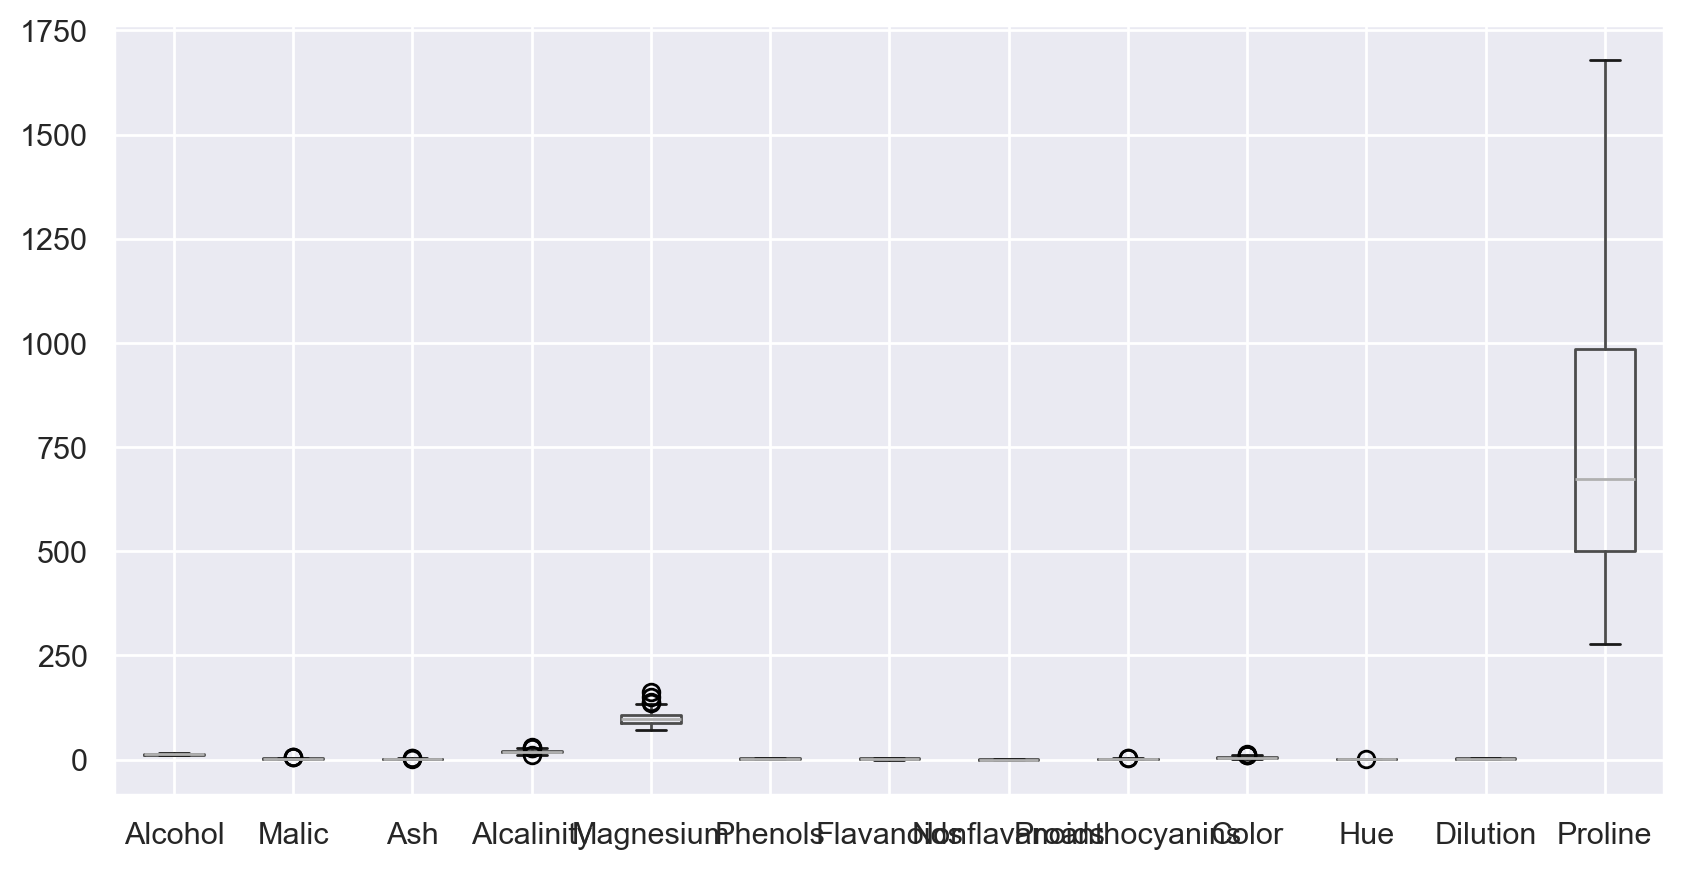

In [252]:
df.boxplot()

Text(0, 0.5, 'Malic')

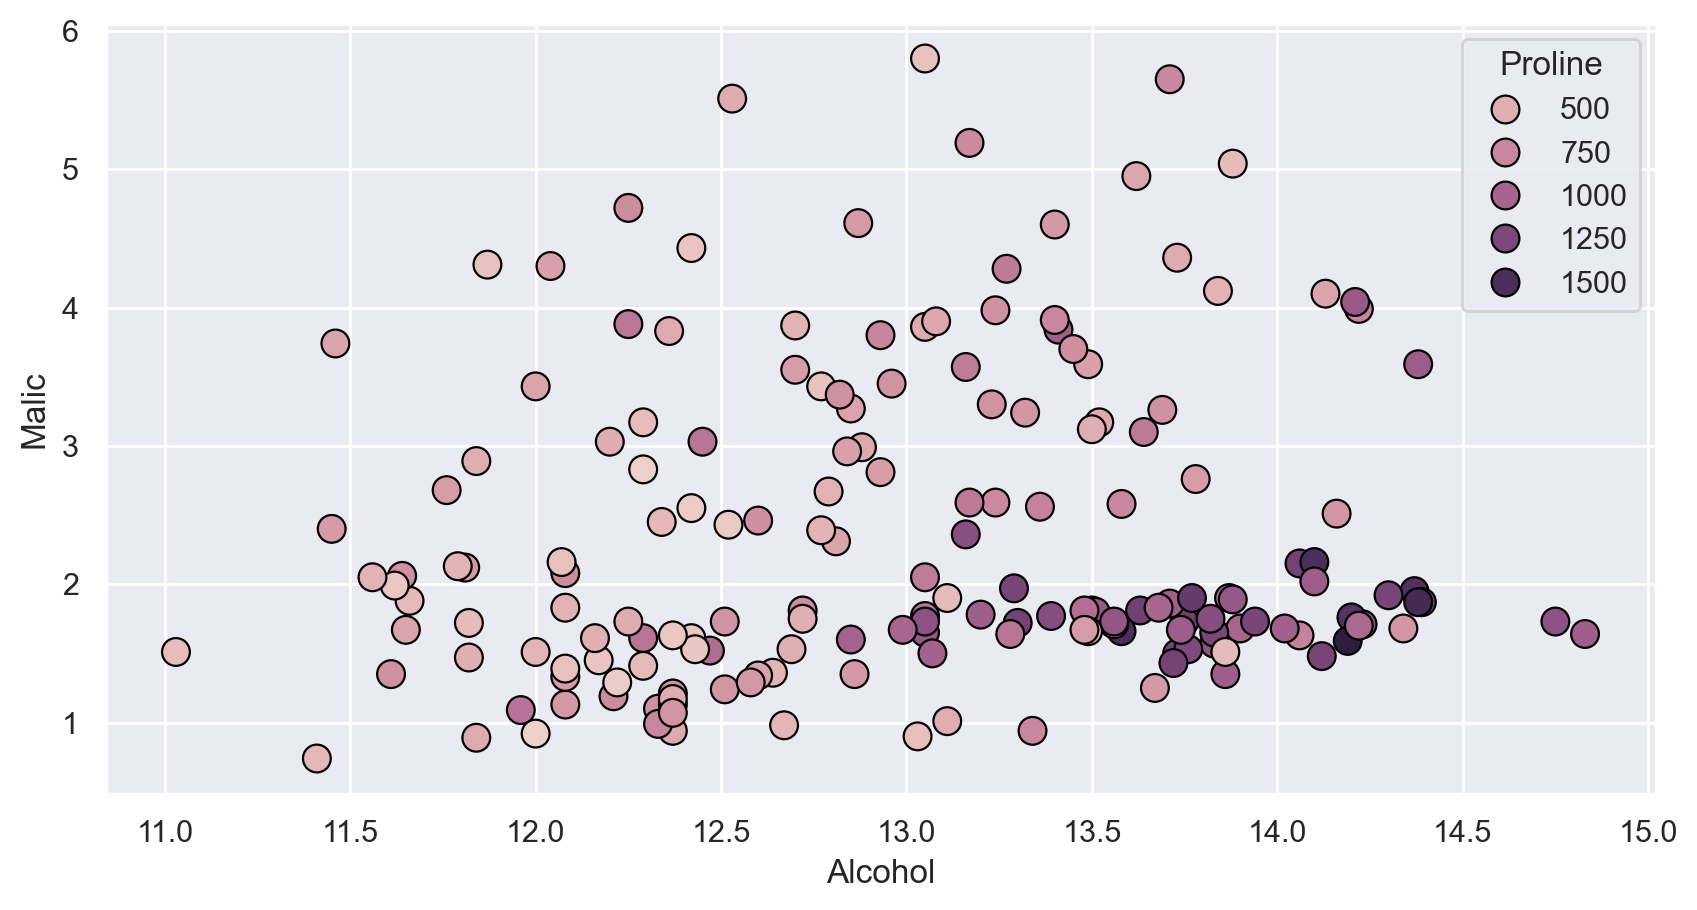

In [253]:
sns.scatterplot(x = df['Alcohol'], y = df['Malic'], hue=df['Proline'], s = 100, edgecolor = 'black')
plt.xlabel('Alcohol')
plt.ylabel('Malic')

In [255]:
x = df.iloc[:,:-1]
y = df['Proline']

In [256]:
x

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93
...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62


In [257]:
x.describe()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000


In [ ]:
#STANDARDLIZATION

In [258]:
sc = StandardScaler()

x = sc.fit_transform(x)
x

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.25171685,
         0.36217728,  1.84791957],
       [ 0.24628963, -0.49941338, -0.82799632, ..., -0.29332133,
         0.40605066,  1.1134493 ],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.26901965,
         0.31830389,  0.78858745],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ...,  2.22423597,
        -1.61212515, -1.48544548],
       [ 0.20923168,  0.22769377,  0.01273209, ...,  1.83492299,
        -1.56825176, -1.40069891],
       [ 1.39508604,  1.58316512,  1.36520822, ...,  1.79166599,
        -1.52437837, -1.42894777]])

In [ ]:
#PCA 

In [259]:
pca = PCA()
pcs = pca.fit_transform(x)

In [260]:
pcs

array([[-2.99074115e+00,  1.79015155e+00, -4.11513784e-01, ...,
         8.82844047e-01,  4.93160575e-01, -5.69344617e-02],
       [-2.02609080e+00, -4.99051191e-01, -1.93457916e+00, ...,
         2.92021422e-01,  3.90288316e-01,  3.13720368e-03],
       [-2.13933414e+00,  1.14948636e+00,  8.89924725e-01, ...,
         5.96519953e-01,  3.17612270e-02,  1.34407707e-02],
       ...,
       [ 3.10986008e+00,  2.21384410e+00, -1.13410236e+00, ...,
        -4.63860511e-01,  7.35672975e-01,  6.85419270e-02],
       [ 2.77210151e+00,  1.75972405e+00, -6.40917710e-01, ...,
         1.99270656e-01,  3.69696675e-01, -2.55438754e-02],
       [ 3.42189511e+00,  2.59860682e+00,  7.50412483e-01, ...,
        -1.73070818e-01, -2.39992917e-01, -3.14761357e-01]])

In [261]:
df.head()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [262]:
pd.DataFrame(pcs)

,0,1,2,3,4,5,6,7,8,9,10,11
0,-2.990741,1.790152,-0.411514,0.669756,0.250455,-0.299579,0.687061,0.046222,0.746693,0.882844,0.493161,-0.056934
1,-2.026091,-0.499051,-1.934579,0.128272,-0.324526,-0.975738,0.136021,-1.034565,-0.160907,0.292021,0.390288,0.003137
2,-2.139334,1.149486,0.889925,-0.810941,0.246854,0.724973,0.290313,0.183957,-0.823926,0.596520,0.031761,0.013441
3,-2.977799,2.744176,-0.418647,-0.572567,-0.113631,0.097818,-0.399272,-0.678047,0.578398,-0.261792,-0.170614,-0.381389
4,-0.971667,1.302544,1.858441,0.537539,-0.010289,-0.480073,0.538557,-0.323472,-0.095654,0.127975,-0.277981,-0.069762
...,...,...,...,...,...,...,...,...,...,...,...,...
173,3.687392,1.633197,-0.437200,-1.242740,0.153086,-0.986474,0.995143,0.151566,-0.153534,-0.288491,0.182863,-0.116257
174,2.849411,1.349546,0.127881,-0.196150,0.440150,0.066956,0.100158,0.516873,-0.067710,-0.268411,-0.251265,-0.192818
175,3.109860,2.213844,-1.134102,0.430362,1.140796,0.404816,0.621055,-0.068603,0.094793,-0.463861,0.735673,0.068542
176,2.772102,1.759724,-0.640918,1.077614,0.204317,1.195402,0.567923,-0.405553,0.483940,0.199271,0.369697,-0.025544


In [263]:
pca.explained_variance_ratio_

array([0.36632969, 0.18127473, 0.11829747, 0.07398949, 0.06798447,
       0.05266292, 0.04565687, 0.0288938 , 0.02162794, 0.02053873,
       0.01412537, 0.00861851])

In [264]:
np.cumsum(pca.explained_variance_ratio_)

array([0.36632969, 0.54760442, 0.66590189, 0.73989138, 0.80787585,
       0.86053877, 0.90619564, 0.93508944, 0.95671738, 0.97725611,
       0.99138149, 1.        ])

Text(0.5, 1.0, 'Scree Plot')

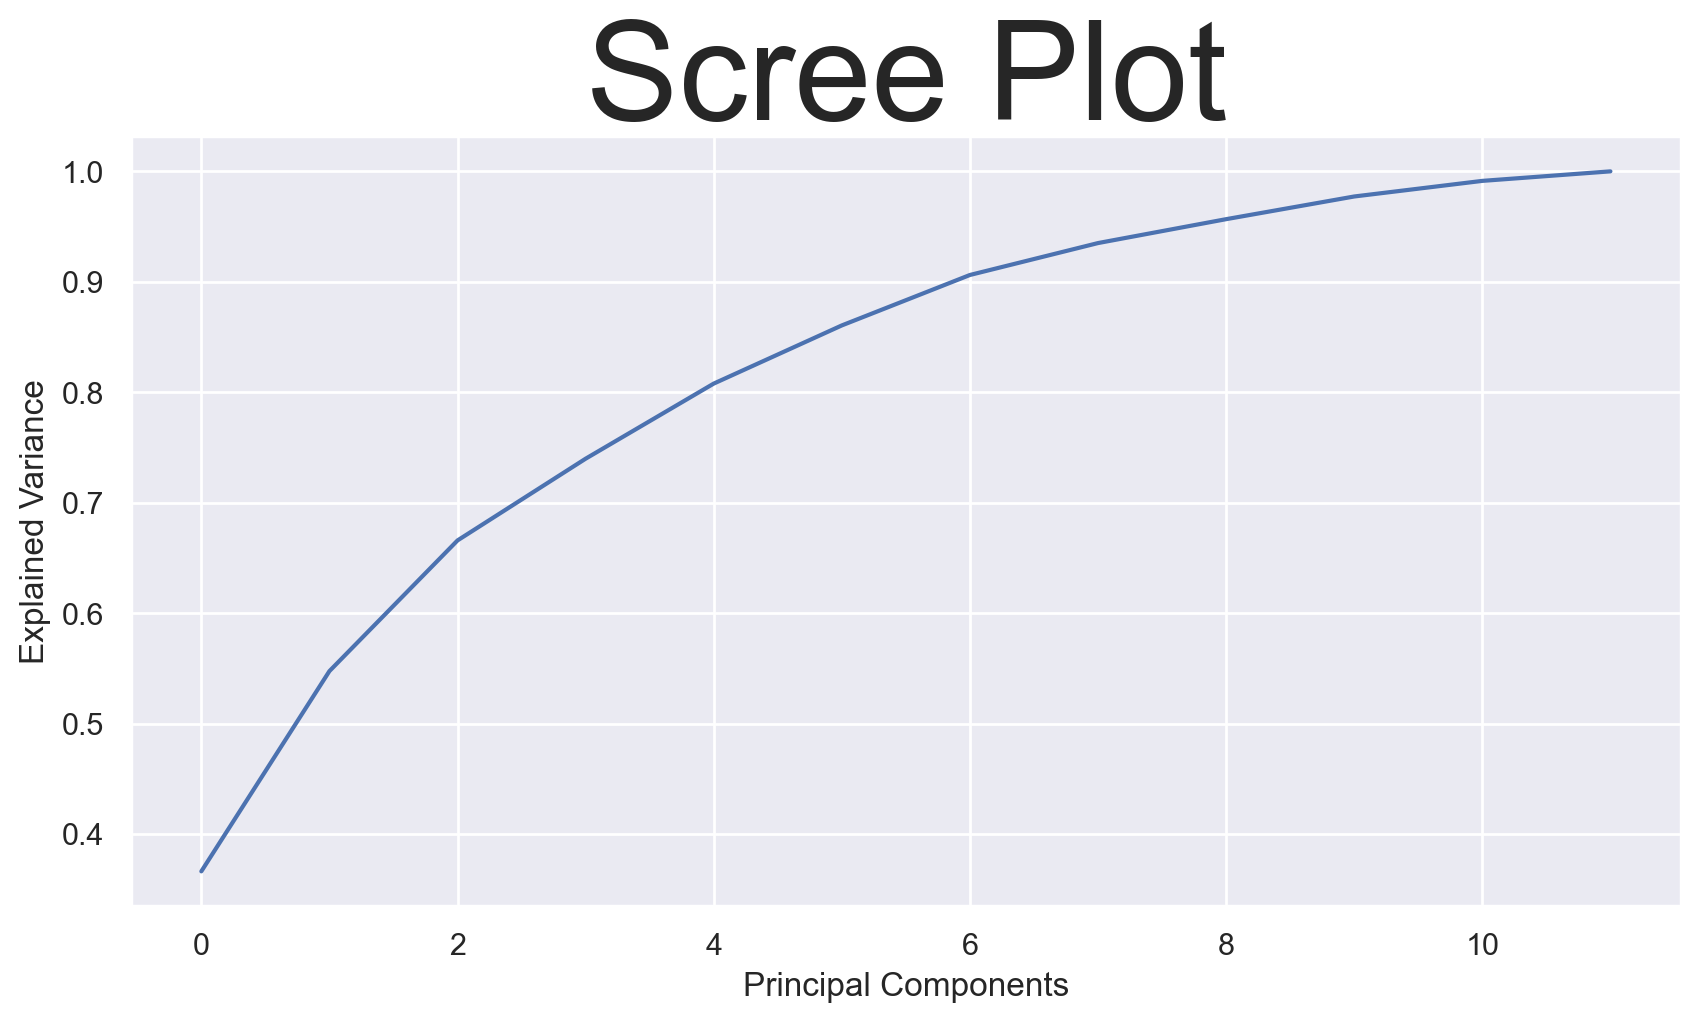

In [265]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance')
plt.title('Scree Plot', size = 50)

In [267]:
pca = PCA(n_components=2)
pcs = pca.fit_transform(x)
pcs

array([[-2.99074115e+00,  1.79015155e+00],
       [-2.02609080e+00, -4.99051191e-01],
       [-2.13933414e+00,  1.14948636e+00],
       [-2.97779920e+00,  2.74417600e+00],
       [-9.71666555e-01,  1.30254425e+00],
       [-2.32362364e+00,  1.85490144e+00],
       [-1.93017090e+00,  9.05971390e-01],
       [-1.48881657e+00,  1.34468227e+00],
       [-2.21010702e+00,  9.24635580e-01],
       [-2.49107455e+00,  9.44287809e-01],
       [-2.81257378e+00,  1.04469103e+00],
       [-1.27810424e+00,  1.30870983e-01],
       [-1.61465637e+00,  2.64306185e-01],
       [-3.07512516e+00,  1.22801815e+00],
       [-3.54069673e+00,  1.93577410e+00],
       [-1.71999624e+00,  1.42064902e+00],
       [-1.55407825e+00,  2.23408029e+00],
       [-1.46475822e+00,  1.62348451e+00],
       [-2.59769719e+00,  2.05238419e+00],
       [-1.94914753e+00,  1.44742901e+00],
       [-3.09297185e+00,  1.44041572e+00],
       [-1.08876540e+00,  5.72341156e-01],
       [-2.36903373e+00, -1.63140801e-03],
       [-1.

In [268]:
data = pd.DataFrame(pcs,columns=['PC1','PC2'])
data

,PC1,PC2
0,-2.990741,1.790152
1,-2.026091,-0.499051
2,-2.139334,1.149486
3,-2.977799,2.744176
4,-0.971667,1.302544
...,...,...
173,3.687392,1.633197
174,2.849411,1.349546
175,3.109860,2.213844
176,2.772102,1.759724


In [270]:
y

0      1065
1      1050
2      1185
3      1480
4       735
       ... 
173     740
174     750
175     835
176     840
177     560
Name: Proline, Length: 178, dtype: int64

In [271]:
data['Class'] = y

In [272]:
data

,PC1,PC2,Class
0,-2.990741,1.790152,1065
1,-2.026091,-0.499051,1050
2,-2.139334,1.149486,1185
3,-2.977799,2.744176,1480
4,-0.971667,1.302544,735
...,...,...,...
173,3.687392,1.633197,740
174,2.849411,1.349546,750
175,3.109860,2.213844,835
176,2.772102,1.759724,840


<Axes: xlabel='PC1', ylabel='PC2'>

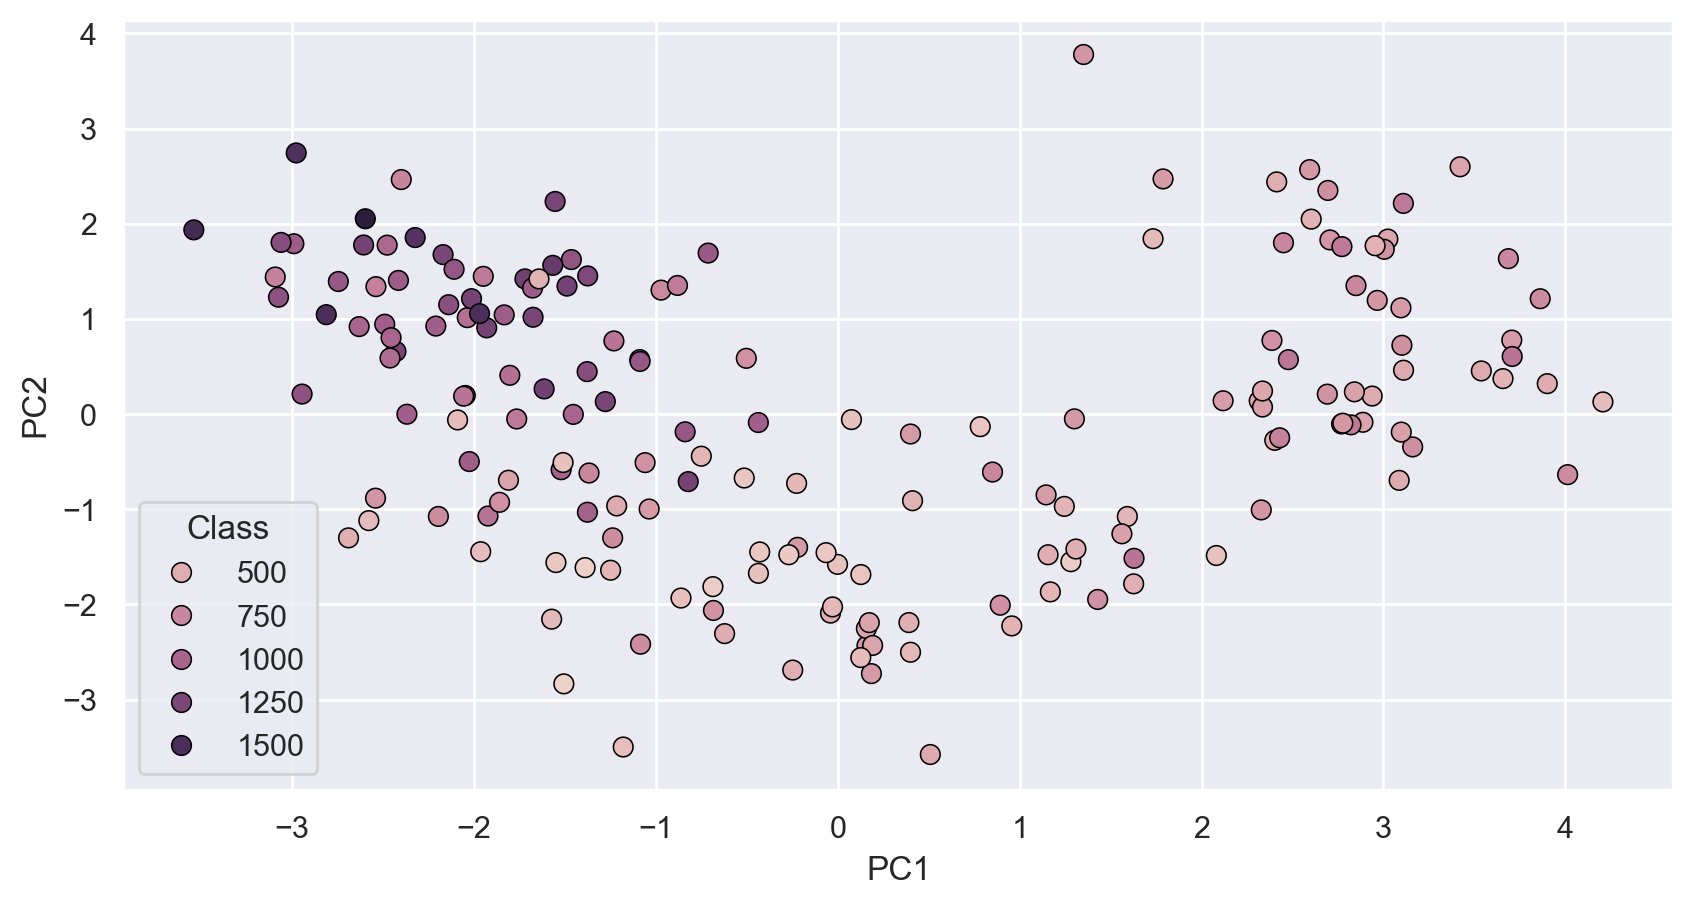

In [280]:
sns.scatterplot(x = data['PC1'], y = data['PC2'],s = 50, edgecolor = 'black',hue=data['Class'])

In [285]:
data

,PC1,PC2,Class
0,-2.990741,1.790152,1065
1,-2.026091,-0.499051,1050
2,-2.139334,1.149486,1185
3,-2.977799,2.744176,1480
4,-0.971667,1.302544,735
...,...,...,...
173,3.687392,1.633197,740
174,2.849411,1.349546,750
175,3.109860,2.213844,835
176,2.772102,1.759724,840


In [ ]:
#CLUSTREING OF THE DATA BY THE K-MEANS CLUSTERING 

In [286]:
from sklearn.cluster import KMeans

In [293]:
df.head()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [294]:
km = KMeans()
yp = km.fit_predict(x)
yp

array([3, 2, 3, 3, 6, 3, 3, 6, 3, 3, 3, 6, 6, 3, 3, 6, 6, 6, 3, 3, 3, 4,
       6, 6, 6, 6, 6, 2, 6, 3, 6, 3, 6, 6, 6, 6, 6, 6, 2, 3, 3, 2, 3, 4,
       3, 6, 3, 3, 3, 3, 3, 6, 3, 6, 3, 3, 3, 6, 3, 2, 7, 7, 2, 2, 5, 6,
       2, 2, 7, 0, 7, 6, 5, 4, 4, 2, 2, 7, 0, 4, 2, 2, 5, 7, 4, 2, 5, 5,
       5, 5, 5, 5, 5, 2, 2, 0, 0, 2, 2, 4, 2, 2, 4, 2, 2, 5, 2, 5, 2, 4,
       4, 2, 5, 5, 5, 5, 2, 5, 7, 2, 4, 4, 4, 4, 4, 2, 4, 5, 5, 5, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 1, 7, 7, 1, 1, 1, 1, 1, 1, 1,
       7, 1, 1, 1, 1, 1, 1, 7, 7, 7, 1, 1, 1, 1, 1, 1, 7, 1, 1, 1, 1, 1,
       1, 1])

In [295]:
len(yp)

178

In [299]:
km.cluster_centers_

array([[-0.98279901, -0.7911539 , -0.75488951, -0.44140207,  3.23040535,
        -0.53295528, -0.43348237, -1.00201987,  1.63662375, -0.96056053,
         0.68025933, -0.06240934],
       [ 0.37256116,  0.99270225,  0.37691235,  0.75223078,  0.04414996,
        -0.85149285, -1.17390783,  0.65356084, -0.42661754,  1.73895652,
        -1.45775582, -1.36251064],
       [-0.64442465, -0.57411178, -1.33191118, -0.50467641, -0.74918649,
         0.09996568,  0.16136791, -0.58761842, -0.19180118, -0.7736285 ,
         0.57214277,  0.44001675],
       [ 1.18764672, -0.34990603, -0.02256086, -1.08157861,  0.56048255,
         1.18471652,  1.19614602, -0.80960502,  0.99590471,  0.50544152,
         0.30771376,  0.87235993],
       [-0.91640352,  0.51326286,  0.30515936,  0.63211678,  0.00936835,
         0.78796679,  0.73990373, -0.39768442,  0.91826926, -0.77239258,
        -0.12042998,  0.85038183],
       [-1.10756077, -0.47831829,  0.17539476,  0.89036187, -0.85952174,
        -0.56820657, -

In [301]:
x

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.25171685,
         0.36217728,  1.84791957],
       [ 0.24628963, -0.49941338, -0.82799632, ..., -0.29332133,
         0.40605066,  1.1134493 ],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.26901965,
         0.31830389,  0.78858745],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ...,  2.22423597,
        -1.61212515, -1.48544548],
       [ 0.20923168,  0.22769377,  0.01273209, ...,  1.83492299,
        -1.56825176, -1.40069891],
       [ 1.39508604,  1.58316512,  1.36520822, ...,  1.79166599,
        -1.52437837, -1.42894777]])

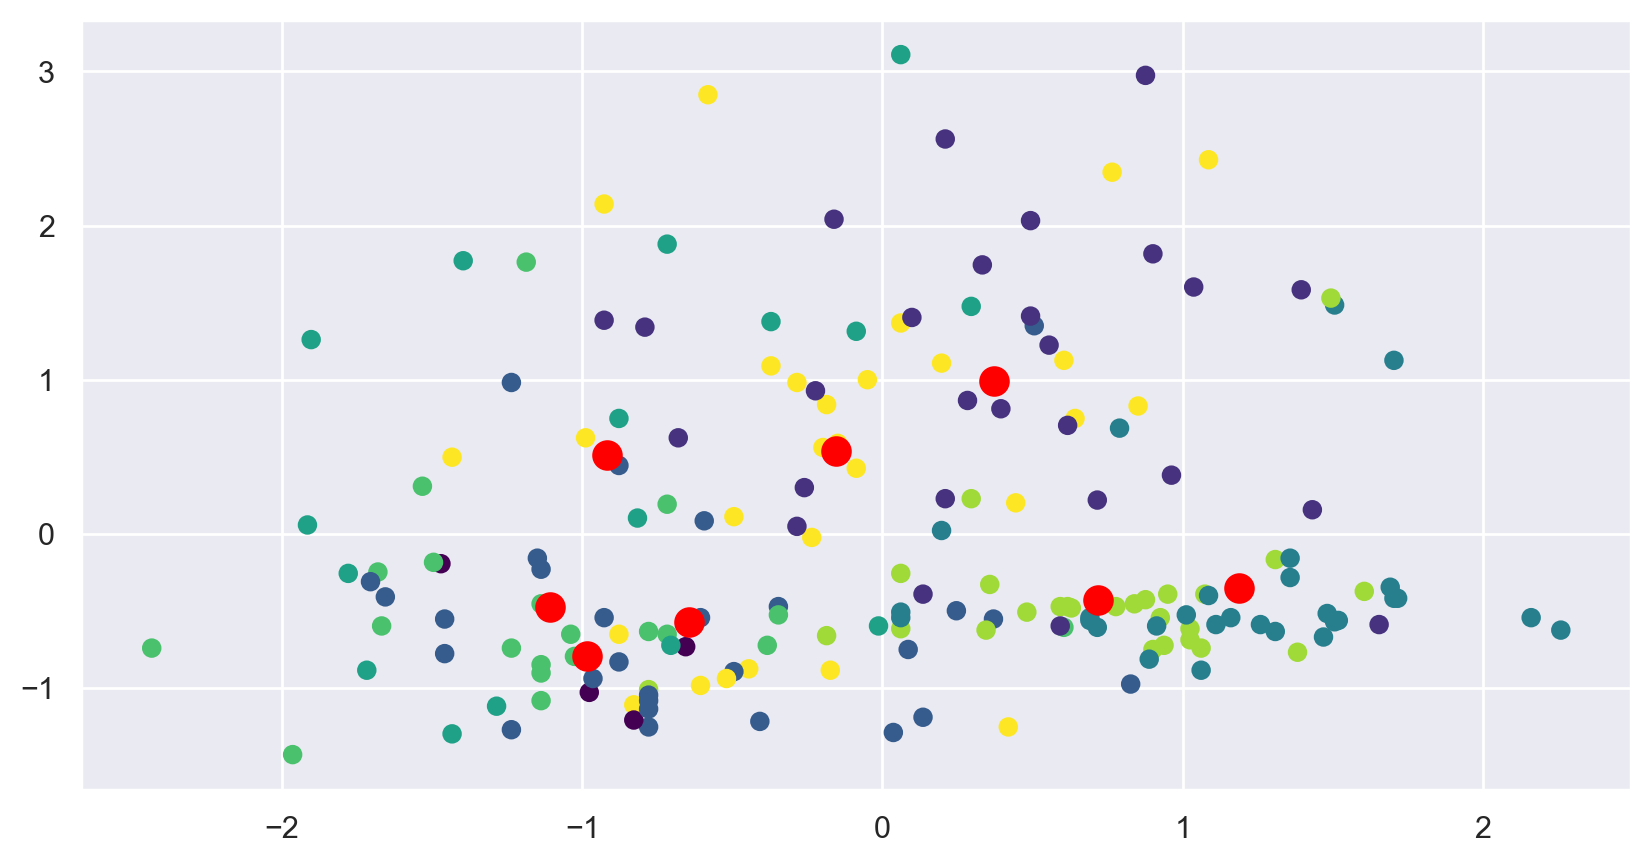

In [302]:
plt.scatter(x[:,0],x[:,1], c = yp, cmap='viridis')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1], c = 'red',s = 100)

In [307]:
km.cluster_centers_

array([[-0.98279901, -0.7911539 , -0.75488951, -0.44140207,  3.23040535,
        -0.53295528, -0.43348237, -1.00201987,  1.63662375, -0.96056053,
         0.68025933, -0.06240934],
       [ 0.37256116,  0.99270225,  0.37691235,  0.75223078,  0.04414996,
        -0.85149285, -1.17390783,  0.65356084, -0.42661754,  1.73895652,
        -1.45775582, -1.36251064],
       [-0.64442465, -0.57411178, -1.33191118, -0.50467641, -0.74918649,
         0.09996568,  0.16136791, -0.58761842, -0.19180118, -0.7736285 ,
         0.57214277,  0.44001675],
       [ 1.18764672, -0.34990603, -0.02256086, -1.08157861,  0.56048255,
         1.18471652,  1.19614602, -0.80960502,  0.99590471,  0.50544152,
         0.30771376,  0.87235993],
       [-0.91640352,  0.51326286,  0.30515936,  0.63211678,  0.00936835,
         0.78796679,  0.73990373, -0.39768442,  0.91826926, -0.77239258,
        -0.12042998,  0.85038183],
       [-1.10756077, -0.47831829,  0.17539476,  0.89036187, -0.85952174,
        -0.56820657, -

In [308]:
km.inertia_

876.8756514957246

In [310]:
wcss = []

for i in range(1,11):
    km = KMeans(n_clusters=i)
    km.fit_predict(x)
    wcss.append(km.inertia_)

In [313]:
wcss

[2136.0,
 1502.035981816053,
 1213.5808238840848,
 1119.9305277847634,
 1048.2801446338665,
 986.8880413532429,
 927.8597199904294,
 883.4976183325793,
 823.66751413024,
 791.6013599427024]

Text(0.5, 1.0, 'Elbow Graph')

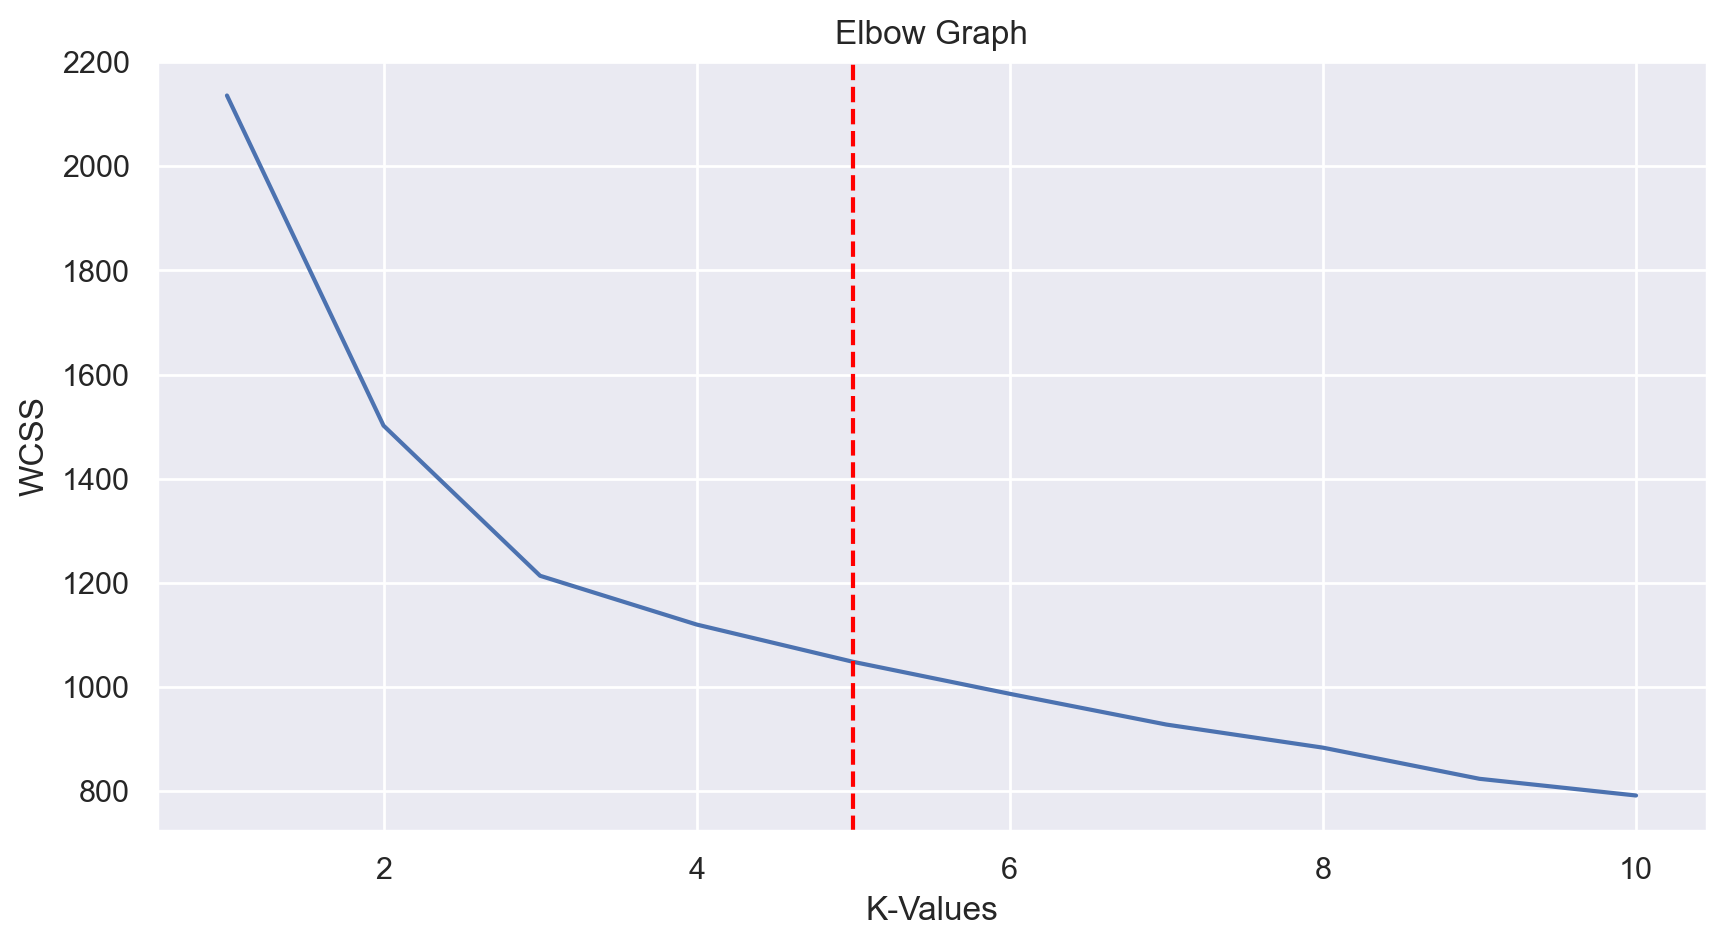

In [314]:
plt.plot(range(1,11),wcss)
plt.axvline(x = 5, linestyle = '--', color = 'red')
plt.xlabel('K-Values')
plt.ylabel('WCSS')
plt.title('Elbow Graph')

In [315]:
km = KMeans(n_clusters=5)
ypred = km.fit_predict(x)
ypred

array([4, 4, 4, 4, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 0, 4, 4, 4, 0,
       4, 2, 0, 0, 4, 2, 0, 4, 0, 4, 4, 0, 0, 4, 0, 2, 2, 4, 4, 2, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 3, 3, 2, 2, 3, 2,
       2, 2, 3, 2, 3, 0, 3, 0, 2, 2, 2, 3, 2, 0, 2, 2, 3, 1, 2, 2, 3, 3,
       3, 3, 3, 3, 3, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 3, 2, 2,
       2, 2, 3, 3, 3, 3, 2, 2, 1, 2, 2, 0, 0, 2, 2, 2, 2, 3, 3, 3, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [316]:
km.cluster_centers_

array([[ 0.19207522, -0.13835331,  1.29007066,  0.71886578,  1.10255106,
         0.64253295,  0.74422637, -0.17609475,  0.48900865, -0.37118393,
         0.72778884,  0.62223308],
       [ 0.17711479,  0.90650664,  0.21596904,  0.55103983, -0.07734512,
        -0.99010047, -1.22711807,  0.71348704, -0.76127859,  0.95438352,
        -1.19006316, -1.28939841],
       [-0.7838639 , -0.41236093, -0.93680647, -0.2875933 , -0.45212107,
         0.21613472,  0.24612138, -0.57898505,  0.25879294, -0.80214435,
         0.37952257,  0.47259443],
       [-1.0250039 , -0.51287833,  0.06146997,  0.58832522, -0.66058394,
        -0.5910398 , -0.3372689 ,  0.935211  , -0.49215846, -0.91153593,
         0.56436047, -0.15480664],
       [ 1.06960809, -0.29754355,  0.11134128, -0.98243881,  0.44922227,
         0.99606029,  1.05746658, -0.69891519,  0.69640652,  0.35653962,
         0.38462413,  0.85264009]])

In [317]:
km.cluster_centers_[:,0]

array([ 0.19207522,  0.17711479, -0.7838639 , -1.0250039 ,  1.06960809])

In [318]:
km.cluster_centers_[:,1]

array([-0.13835331,  0.90650664, -0.41236093, -0.51287833, -0.29754355])

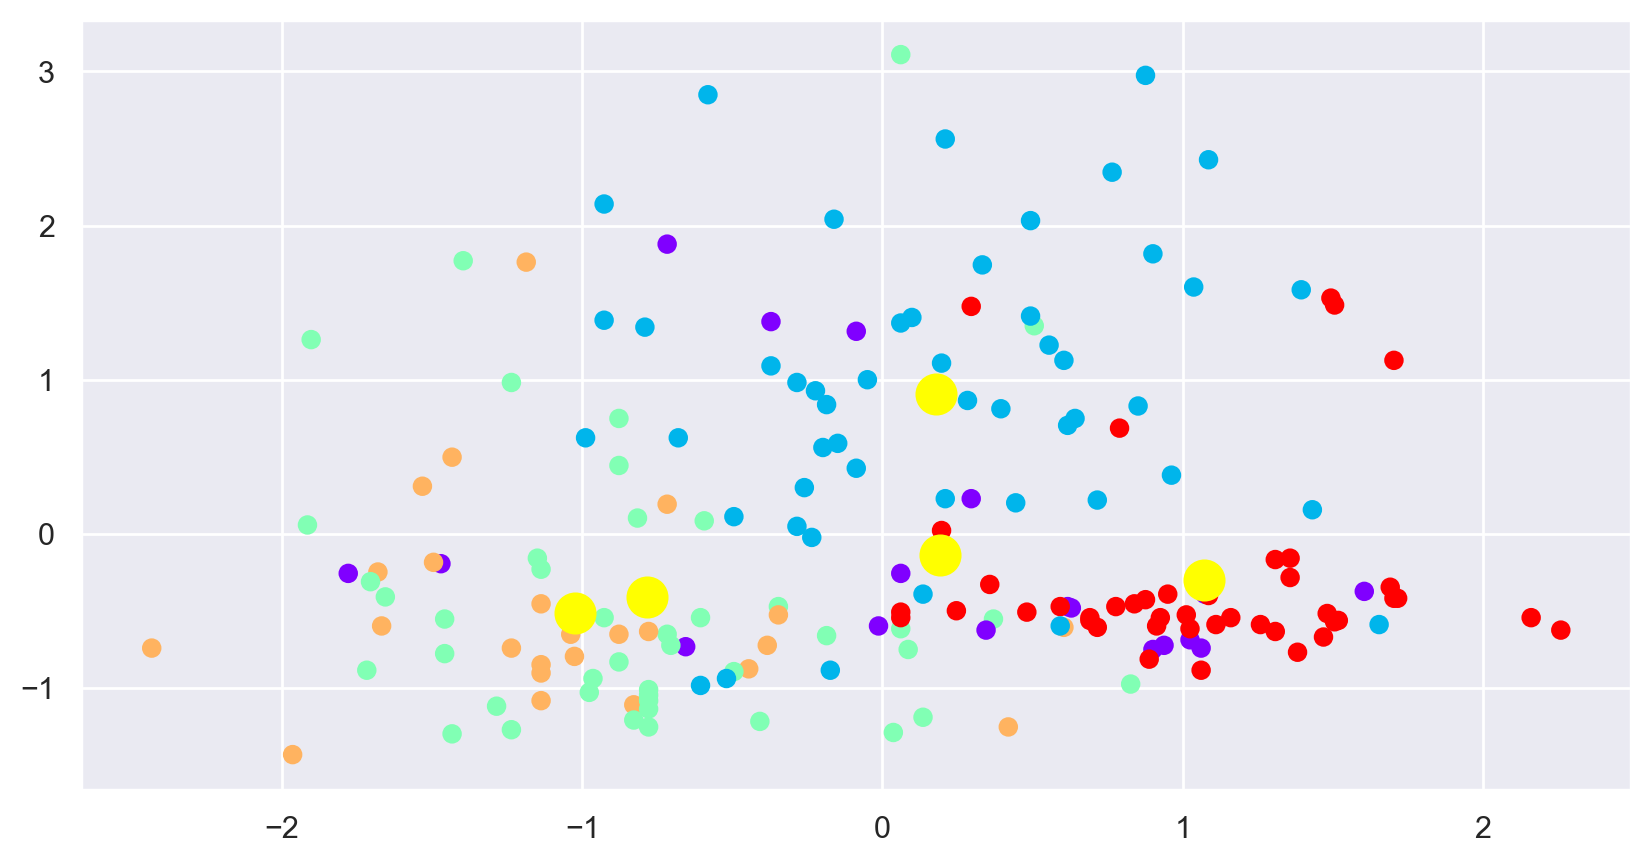

In [319]:
plt.scatter(x[:,0],x[:,1], c = ypred, cmap='rainbow')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1], c = 'yellow',s = 200)

In [320]:
from sklearn.metrics import silhouette_score

In [321]:
x

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.25171685,
         0.36217728,  1.84791957],
       [ 0.24628963, -0.49941338, -0.82799632, ..., -0.29332133,
         0.40605066,  1.1134493 ],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.26901965,
         0.31830389,  0.78858745],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ...,  2.22423597,
        -1.61212515, -1.48544548],
       [ 0.20923168,  0.22769377,  0.01273209, ...,  1.83492299,
        -1.56825176, -1.40069891],
       [ 1.39508604,  1.58316512,  1.36520822, ...,  1.79166599,
        -1.52437837, -1.42894777]])

In [322]:
silhouette_score(x,ypred)

0.19894709234846542

In [323]:
ypred

array([4, 4, 4, 4, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 0, 4, 4, 4, 0,
       4, 2, 0, 0, 4, 2, 0, 4, 0, 4, 4, 0, 0, 4, 0, 2, 2, 4, 4, 2, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 3, 3, 2, 2, 3, 2,
       2, 2, 3, 2, 3, 0, 3, 0, 2, 2, 2, 3, 2, 0, 2, 2, 3, 1, 2, 2, 3, 3,
       3, 3, 3, 3, 3, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 3, 2, 2,
       2, 2, 3, 3, 3, 3, 2, 2, 1, 2, 2, 0, 0, 2, 2, 2, 2, 3, 3, 3, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [324]:
df['cluster'] = ypred
df

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,cluster
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,4
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,4
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,4
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,4
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,1
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,1
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,1
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,1


In [325]:
df.groupby('cluster').agg('mean')

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
cluster,,,,,,,,,,,,,
0,13.156111,2.182222,2.719444,21.888889,115.444444,2.696111,2.770556,0.340000,1.870000,4.200000,1.123333,3.052222,847.222222
1,13.144000,3.346200,2.425600,21.330000,98.640000,1.677200,0.807000,0.450400,1.156400,7.264400,0.686200,1.698800,622.440000
2,12.366047,1.876977,2.110233,18.537209,93.302326,2.430000,2.274419,0.290000,1.738605,3.203721,1.043953,2.946279,574.186047
3,12.170833,1.765000,2.383333,21.454167,90.333333,1.926250,1.693333,0.477917,1.310000,2.950833,1.086083,2.502083,521.583333
4,13.866512,2.004884,2.396977,16.223256,106.139535,2.916744,3.082558,0.275116,1.988372,5.882326,1.045116,3.215349,1148.069767


In [326]:
df['cluster'].value_counts()

1    50
4    43
2    43
3    24
0    18
Name: cluster, dtype: int64